In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
df = pd.read_csv('Social_Network_Ads.csv')

In [105]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
274,15692819,Female,57,26000,1


In [106]:
df.drop(['User ID','Gender'], axis=1, inplace=True)

In [107]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


x_train: The training set features (70% of the Age and EstimatedSalary data). <br>
x_test: The testing set features (30% of the Age and EstimatedSalary data). <br>
y_train: The training set labels (70% of the Purchased values). <br>
y_test: The testing set labels (30% of the Purchased values).

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                                    df.drop('Purchased',axis=1), 
                                                    df['Purchased'], 
                                                    test_size=0.30, 
                                                    random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)


In [9]:
x_train 

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
x_train_std

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [11]:
x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns)
x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)

In [12]:
x_train_std

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [20]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [21]:
np.round(x_train_std.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


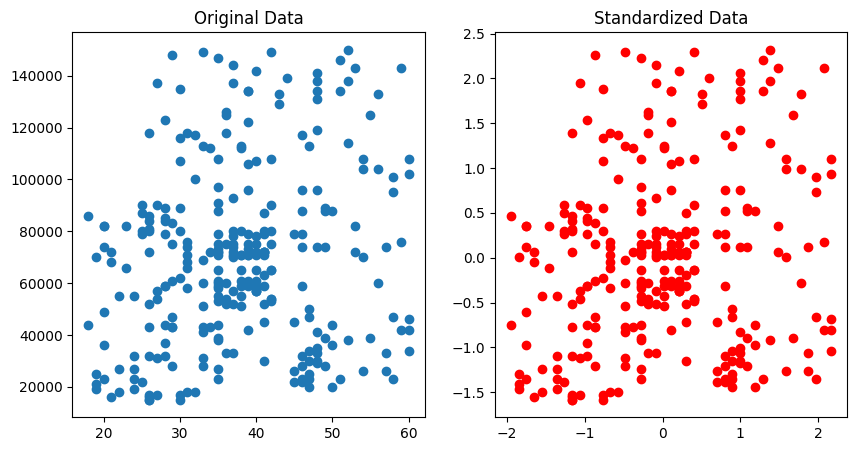

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax2.set_title('Standardized Data')
ax2.scatter(x_train_std['Age'], x_train_std['EstimatedSalary'], color='red')

plt.show()

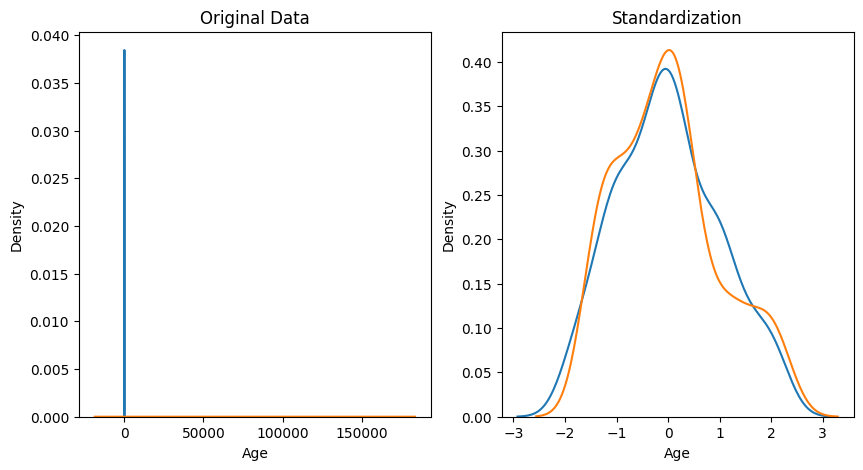

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Standardization')
sns.kdeplot(x_train_std['Age'], ax=ax2)
sns.kdeplot(x_train_std['EstimatedSalary'], ax=ax2)

plt.show()

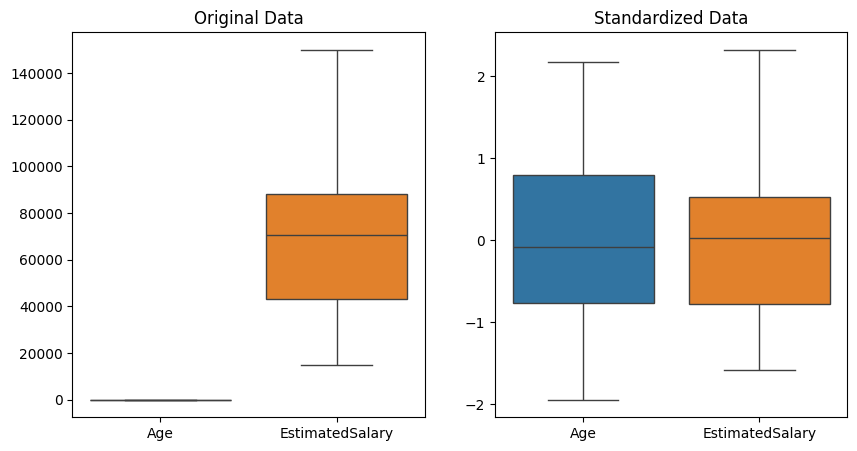

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.boxplot(data=x_train, ax=ax1)

ax2.set_title('Standardized Data')
sns.boxplot(data=x_train_std, ax=ax2)

plt.show()

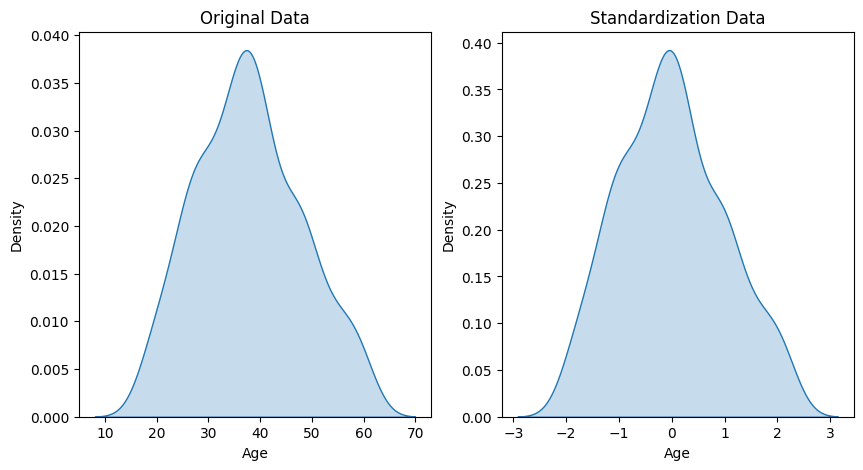

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(x_train['Age'], ax=ax1, fill=True)

ax2.set_title('Standardization Data')
sns.kdeplot(x_train_std['Age'], ax=ax2, fill=True)

plt.show()

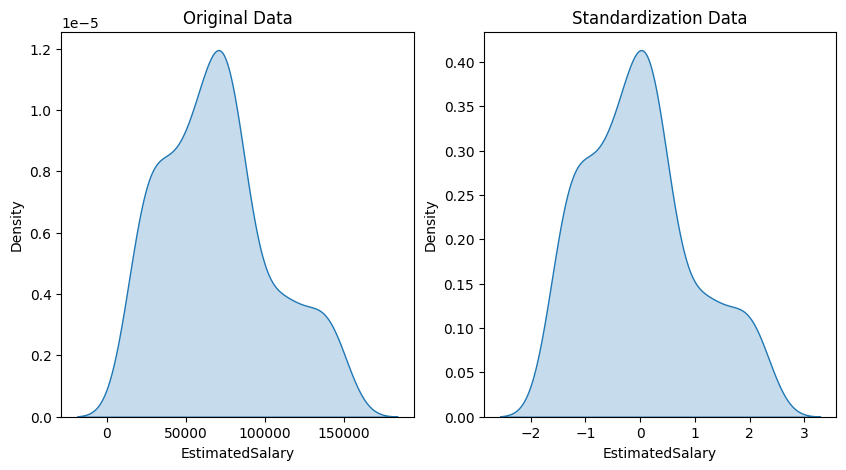

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Original Data')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, fill=True)

ax2.set_title('Standardization Data')
sns.kdeplot(x_train_std['EstimatedSalary'], ax=ax2, fill=True)

plt.show()

### train model Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

ori_data = LogisticRegression()
std_data = LogisticRegression()

In [44]:
ori_data.fit(x_train, y_train)
std_data.fit(x_train_std, y_train)

LogisticRegression()

In [45]:
y_predict_ori = ori_data.predict(x_test)
y_predict_std = std_data.predict(x_test_std)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_ori = accuracy_score(y_test, y_predict_ori)
accuracy_std = accuracy_score(y_test, y_predict_std)

print(accuracy_ori)
print(accuracy_std)

0.875
0.8666666666666667


In [68]:
# convert to pandas.DataFrame
data = pd.DataFrame()
data['accuracy'] = [accuracy_ori, accuracy_std]

data['data'] = ['original', 'standardized']
data

,accuracy,data
0,0.875000,original
1,0.866667,standardized


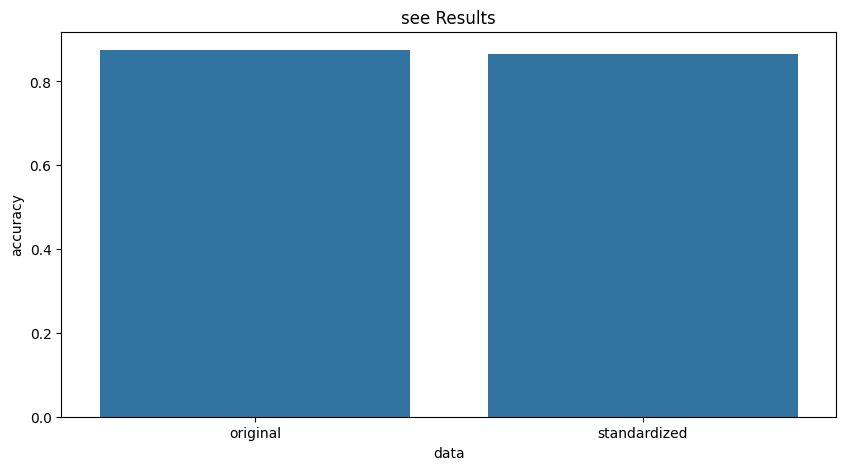

In [77]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))


ax1.set_title('see Results')
sns.barplot(x='data', y='accuracy', data=data, ax=ax1)

plt.show()

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

ori_tree = DecisionTreeClassifier()
std_tree = DecisionTreeClassifier()


In [82]:
ori_data.fit(x_train, y_train)
std_data.fit(x_train_std, y_train)

LogisticRegression()

In [83]:
y_predict_orig = ori_data.predict(x_test)
y_predict_std = std_data.predict(x_test_std)

In [85]:
accuracy_orig = accuracy_score(y_test, y_predict_orig)
accuracy_std = accuracy_score(y_test, y_predict_std)

print("Accuracy Original Data:", accuracy_orig)
print("Accuracy Standardized Data:", accuracy_std)

Accuracy Original Data: 0.875
Accuracy Standardized Data: 0.8666666666666667


### outliers

In [86]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [108]:

data = pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})

# Concatenating the two DataFrames
df = pd.concat([df, data], ignore_index=True)

In [109]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


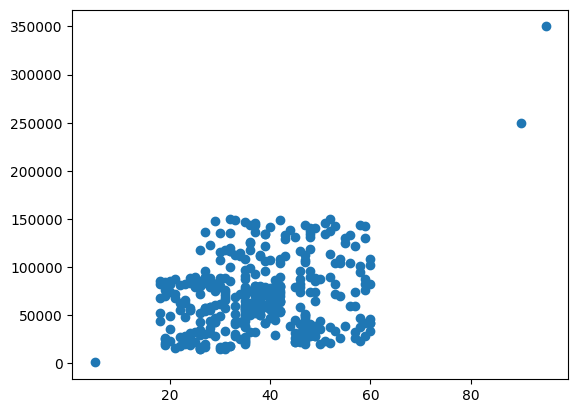

In [110]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.show()

In [116]:
x_train, x_test, y_train, y_test = train_test_split(
                                                        df.drop('Purchased', axis=1), 
                                                        df['Purchased'], 
                                                        test_size=0.2, 
                                                        random_state=0
)

x_train.shape, x_test.shape

((322, 2), (81, 2))

In [114]:
scaler = StandardScaler()

In [117]:
scaler.fit(x_train)

x_train_out = scaler.transform(x_train)
x_test_out = scaler.transform(x_test)


In [118]:
x_train_out = pd.DataFrame(x_train_out, columns=x_train.columns)
x_test_out = pd.DataFrame(x_test_out, columns=x_test.columns)


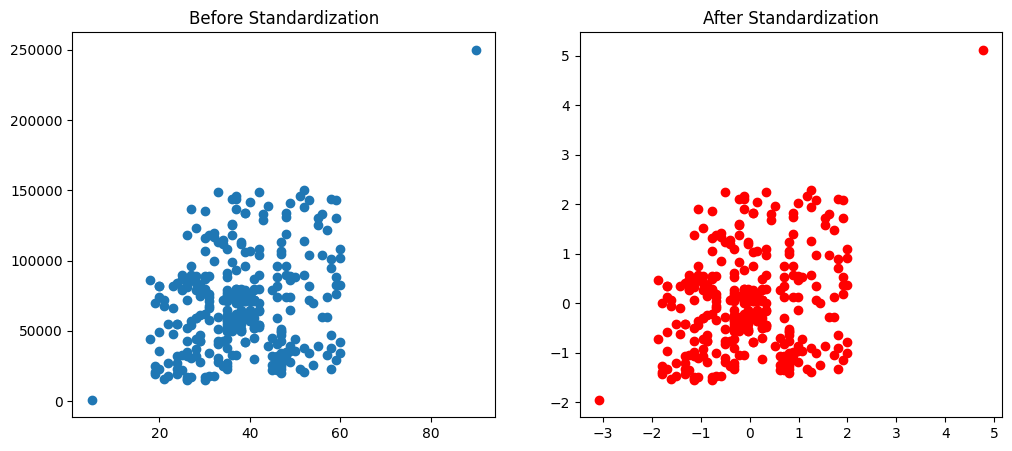

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Standardization')
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])

ax2.set_title('After Standardization')
ax2.scatter(x_train_out['Age'], x_train_out['EstimatedSalary'], color='red')

plt.show()